### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Read Dataset

In [7]:
df = pd.read_csv('/content/Real_Estates_Dataset_Egypt_2022.csv')
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City
0,Penthouse,3000000,3,3,175,No,3,Cash,Semi Finished,Stone Residence
1,Duplex,8818000,4,4,290,Unknown,12,Cash or Installment,Semi Finished,Sheikh Zayed
2,Apartment,4470000,3,2,155,No,2,Installment,Semi Finished,Taj City
3,Apartment,492000,3,2,282,Unknown,4,Unknown,Unknown,New Cairo - El Tagamoa
4,Apartment,1855000,3,3,200,No,2,Cash,Core & Shell,Garden Hills
...,...,...,...,...,...,...,...,...,...,...
22115,Apartment,6016000,3,2,164,Unknown,2,Cash or Installment,Core & Shell,Galleria Moon Valley
22116,Apartment,4840000,3,3,176,No,9,Installment,Finished,Camp Caesar
22117,Apartment,5200000,3,3,175,Unknown,12,Installment,Semi Finished,6th of October
22118,Apartment,2717000,2,2,161,Unknown,2,Cash or Installment,Finished,New Capital City


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22120 entries, 0 to 22119
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            22120 non-null  object
 1   Price           22104 non-null  object
 2   Bedrooms        22118 non-null  object
 3   Bathrooms       22119 non-null  object
 4   Area            22087 non-null  object
 5   Furnished       22120 non-null  object
 6   Level           22120 non-null  object
 7   Payment_Option  22120 non-null  object
 8   Delivery_Term   22120 non-null  object
 9   City            22118 non-null  object
dtypes: object(10)
memory usage: 1.7+ MB


### Data Cleaning

In [ ]:
# Replacing all occurrences of 'Unknown' in all columns with NaN (Not a Number)

df['Area'] = df['Area'].replace('Unknown', np.nan)

df['Bedrooms'] = df['Bedrooms'].replace('Unknown', np.nan)

df['Bathrooms'] = df['Bathrooms'].replace('Unknown', np.nan)

df['Price'] = df['Price'].replace('Unknown', np.nan)

# Dropping all rows in the DataFrame where at least one value is NaN , to ensure a clean dataset
df.dropna(inplace=True)


In [ ]:
# Replacing occurrences of '10+' in the 'Bedrooms' and 'Bathrooms' columns with 11 , This ensures numeric consistency by converting '10+' to a manageable value

df['Bedrooms'] = df['Bedrooms'].replace('10+', 11)

df['Bathrooms'] = df['Bathrooms'].replace('10+', 11)

# Replacing occurrences of 'Unknown' in the 'Furnished' column with 'No'
# Assumes that 'Unknown' furnishing status means the property is not furnished
df['Furnished'] = df['Furnished'].replace('Unknown', 'No')

# Replacing occurrences of 'Unknown' in the 'Payment_Option' column with 'Cash'
df['Payment_Option'] = df['Payment_Option'].replace('Unknown', 'Cash')

# Replacing occurrences of 'Unknown ' (with a trailing space) in the 'Delivery_Term' column with 'Not Finished'
df['Delivery_Term'] = df['Delivery_Term'].replace('Unknown ', 'Not Finished')


In [ ]:
# Converting some columns to integers

df['Bedrooms'] = df['Bedrooms'].astype(int)

df['Bathrooms'] = df['Bathrooms'].astype(int)

df['Area'] = df['Area'].astype(float).astype(int)

df['Price'] = df['Price'].astype(int)


In [ ]:
# Printing the unique values in columns
print(df['Level'].unique())

print(df['Type'].unique())

print(df['Payment_Option'].unique())


['3' '12' '2' '4' '1' '9' '13' '7' '5' '6' '10' '11' '8']
['Penthouse' 'Duplex' 'Apartment' 'Studio']
['Cash' 'Cash or Installment' 'Installment']


In [ ]:
# Dropping rows where 'Level' is 'Unknown' and 'Type' is 'Duplex'
df = df.drop(df[(df['Level'] == 'Unknown') & (df['Type'] == 'Duplex')].index)

# Dropping rows where 'Level' is 'Unknown' and 'Type' is 'Apartment'
df = df.drop(df[(df['Level'] == 'Unknown') & (df['Type'] == 'Apartment')].index)

# Dropping rows where 'Level' is 'Unknown' and 'Type' is 'Studio'
df = df.drop(df[(df['Level'] == 'Unknown') & (df['Type'] == 'Studio')].index)


In [ ]:
# Updating the 'Level' column: replacing '10+' with 11
df.loc[(df['Level'] == '10+'), 'Level'] = 11

# Updating the 'Level' column: replacing 'Highest' with 12
df.loc[(df['Level'] == 'Highest'), 'Level'] = 12

# Updating the 'Level' column: replacing 'Ground' with 0
df.loc[(df['Level'] == 'Ground'), 'Level'] = 0

# Updating the 'Level' column for properties of type 'Penthouse': assigning level 12
df.loc[(df['Type'] == 'Penthouse'), 'Level'] = 12


In [ ]:
# Converting the 'Level' column to integers
df['Level'] = df['Level'].astype(int)

In [ ]:
# Printing the unique values in the 'Level' column
print(df['Level'].unique())

[12  2  4  1  3  9 13  7  5  6 10 11  8]


In [ ]:
# Resetting the index of the DataFrame
df.reset_index(inplace=True)

# Dropping the 'index' column that was added during the reset_index operation
df.drop(['index'], axis=1, inplace=True)


In [ ]:
# Counting the occurrences of each unique value in the 'Type' column
df['Type'].value_counts()

,count
Type,
Apartment,19225
Duplex,1691
Penthouse,762
Studio,386


In [ ]:
# Counting the occurrences of each unique value in the 'City' column, including NaN values
city_name = df['City'].value_counts(dropna=False).keys().tolist()

# Getting the counts (values) of each unique city, including NaN values
val = df['City'].value_counts(dropna=False).tolist()

# Creating a list of tuples where each tuple contains a city name and its corresponding count
value_dict = list(zip(city_name, val))

In [ ]:
# Initializing an empty list to store cities with low frequency
Low_frequency_city = []

# Setting a threshold value for low frequency cities
y = 'Less'

# Loop through each (city_name, val) pair in the `value_dict` list
for city_name, val in value_dict:
    # If the count of the city (val) is less than or equal to 5
    if val <= 5:
        # Append the city name to the `Low_frequency_city` list
        Low_frequency_city.append(city_name)
    else:
        pass

# Define function `lcdlt()` to replace city names with 'Less' if they are in `Low_frequency_city`
def lcdlt(x):
    if x in Low_frequency_city:  # If the city is in the list of low-frequency cities
        return y  # Replace it with 'Less'
    else:
        return x  # Otherwise, return the original city name

# Apply the `lcdlt()` function to the 'City' column
df['City'] = df['City'].apply(lcdlt)

# Drop all rows where the 'City' column has the value 'Less'
df = df.drop(df[df['City'] == 'Less'].index)


In [ ]:
# Getting the unique city names from the 'City' column
lcc = df['City'].unique()

# Iterating over each city in the list of unique cities
for x in lcc:
    # Calculating the standard deviation of the 'Price' column for each city 'x'
    std = df[(df['City'] == x)]['Price'].std()

    # Calculating the mean of the 'Price' column for each city 'x'
    M = df[(df['City'] == x)]['Price'].mean()

    # Calculating the upper bound: mean + standard deviation
    upper_bound = M + std

    # Calculating the lower bound: mean - standard deviation
    lower_bound = M - std

    # Dropping rows where 'Price' is greater than or equal to the upper bound for each city 'x'
    df = df.drop(df[(df['City'] == x) & (df['Price'] >= upper_bound)].index)

    # Dropping rows where 'Price' is less than or equal to the lower bound for each city 'x'
    df = df.drop(df[(df['City'] == x) & (df['Price'] <= lower_bound)].index)


In [ ]:
# Dropping rows where the 'Area' is less than or equal to 100 and 'Bedrooms' is greater than or equal to 4
df = df.drop(df[(df['Area'] <= 100) & (df['Bedrooms'] >= 4)].index)

# Dropping rows where the 'Area' is less than or equal to 30 and 'Type' is not 'Studio'
df = df.drop(df[(df['Area'] <= 30) & (df['Type'] != 'Studio')].index)


In [ ]:
# Resetting the index of the dataframe to ensure it has a sequential integer index
df.reset_index(inplace=True)

# Dropping the 'index' column that was added after resetting the index
df.drop(['index'], axis=1, inplace=True)

In [ ]:
# Iterating over each column in the DataFrame to analyze its unique values and top value counts
for col in df.columns:
    # Printing the column name followed by the number of unique values in that column
    # `nunique()` gives the number of distinct values in the column
    print(col, ':', df[col].nunique())

    # Printing the 7 most frequent values in the column and their counts
    # `value_counts()` counts the occurrences of each unique value in the column
    # `nlargest(7)` returns the top 7 most frequent values
    print(df[col].value_counts().nlargest(7))

    # Adding a separator line to visually separate the output for each column
    print('\n' + '*' * 20 + '\n')


Type : 4
Type
Apartment    14773
Duplex        1003
Penthouse      487
Studio         274
Name: count, dtype: int64

********************

Price : 2669
Price
3500000    345
2500000    317
3000000    272
4000000    246
2000000    235
1500000    223
4500000    216
Name: count, dtype: int64

********************

Bedrooms : 9
Bedrooms
3    10468
2     4045
4     1329
1      493
5      171
6       20
7        7
Name: count, dtype: int64

********************

Bathrooms : 8
Bathrooms
2    6995
3    5551
1    3433
4     490
5      56
6      10
8       1
Name: count, dtype: int64

********************

Area : 338
Area
120    632
140    552
130    523
150    523
200    499
160    460
165    436
Name: count, dtype: int64

********************

Furnished : 2
Furnished
No     16038
Yes      499
Name: count, dtype: int64

********************

Level : 13
Level
2     4297
12    3111
3     2643
1     2158
4     1245
5      937
11     517
Name: count, dtype: int64

********************

Payment_Optio

In [ ]:
# Converting categorical columns into dummy/indicator variables
# pd.get_dummies() creates binary (0 or 1) columns for each unique category within the specified categorical columns
# It replaces the categorical columns with the newly created dummy columns
df = pd.get_dummies(df, columns=['Type', 'Delivery_Term', 'Furnished', 'City', 'Payment_Option'])

# Dropping the 'Price' column to create the features set 'X'
X = df.drop(columns=['Price'])

# Creating the target variable 'y' as the 'Price' column
y = df[['Price']]


### Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=404)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13229, 237), (3308, 237), (13229, 1), (3308, 1))

In [ ]:
# Defining a function to evaluate the performance of a machine learning model
def performance(model, X_train, y_train, y_pred, y_test):

    # The score method returns the R^2 score of the model on the training data
    print('Training Score:', model.score(X_train, y_train))

    # r2_score evaluates the R^2 score of the predicted values against the true test target values (y_test)
    print('Testing Score:', r2_score(y_test, y_pred))

    print('Other Metrics In Testing Data: ')

    print('MSE:', mean_squared_error(y_test, y_pred))

    print('MAE:', mean_absolute_error(y_test, y_pred))

### Building a Machine Learning Models

#### 1 - Linear Regression

Training Score: 0.6843632809869825
Testing Score: 0.6890464824199851
Other Metrics In Testing Data: 
MSE: 1460618852465.072
MAE: 841087.5114873035


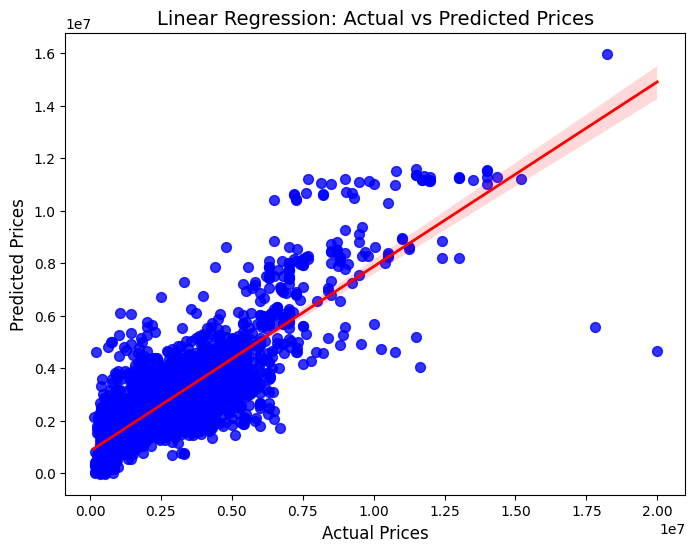

In [ ]:
# Linear Regression model
lr = LinearRegression()

# Training the model on the training data
lr.fit(X_train, y_train)

# Making predictions on the test data
lr_pred = lr.predict(X_test)

# Evaluating the model's performance by calling the performance function
performance(lr, X_train, y_train, lr_pred, y_test)

# Visualizing the relationship between actual and predicted values using a regression plot
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
sns.regplot(x=y_test, y=lr_pred, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red', 'lw': 2})

# Adding titles and labels to the plot for clarity
plt.title('Linear Regression: Actual vs Predicted Prices', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)

# Show the plot
plt.show()


### 2 - Ridge Regression

In [ ]:
# Initialize the Ridge regression model 
ridge = Ridge(alpha=1)

# Train the Ridge regression model on the training data
ridge.fit(X_train, y_train)

# Predict the target variable (Price) for the test data using the trained model
ridge_pred = ridge.predict(X_test)

# Evaluate the Ridge regression model's performance
performance(ridge, X_train, y_train, ridge_pred, y_test)


Training Score: 0.6832292080186531
Testing Score: 0.6884440648643069
Other Metrics In Testing Data: 
MSE: 1463448543686.2144
MAE: 844172.1715822741


#### 3 - Decision Tree

In [ ]:
# Initialize the Decision Tree Regressor model with a maximum depth of 60
dt = DecisionTreeRegressor(max_depth=60)

# Train the Decision Tree Regressor model on the training data
dt.fit(X_train, y_train)

# Predict the target variable (Price) for the test data using the trained model
dt_pred = dt.predict(X_test)

# Evaluate the Decision Tree Regressor model's performance
performance(dt, X_train, y_train, dt_pred, y_test)


Training Score: 0.9725821641164791
Testing Score: 0.6696860147468813
Other Metrics In Testing Data: 
MSE: 1551559338670.0537
MAE: 708250.0765455348


#### 4 - Random Forest

In [ ]:
# Initialize the Random Forest Regressor model with 20 estimators (trees) and a maximum depth of 100
rf = RandomForestRegressor(n_estimators=20, max_depth=100)

# Train the Random Forest Regressor model on the training data
# The target variable y_train is flattened using .values.ravel() to match the required input shape
rf.fit(X_train, y_train.values.ravel())

# Predict the target variable (Price) for the test data using the trained model
rf_pred = rf.predict(X_test)

# Evaluate the Random Forest Regressor model's performance
performance(rf, X_train, y_train, rf_pred, y_test)


Training Score: 0.9464503984908458
Testing Score: 0.7606555500924516
Other Metrics In Testing Data: 
MSE: 1124254899859.3984
MAE: 635288.1081955907


#### 5 - XGB Regressor

In [ ]:
# Initialize the XGBoost Regressor model with 400 estimators, a maximum depth of 30, and a learning rate of 0.1
xgb = XGBRegressor(n_estimators=400, max_depth=30, learning_rate=0.1)

# Train the XGBoost Regressor model on the training data
xgb.fit(X_train, y_train)

# Predict the target variable (Price) for the test data using the trained model
xgb_pred = xgb.predict(X_test)

# Evaluate the XGBoost Regressor model's performance
performance(xgb, X_train, y_train, xgb_pred, y_test)


Training Score: 0.9820752739906311
Testing Score: 0.7433891892433167
Other Metrics In Testing Data: 
MSE: 1205358937333.224
MAE: 623964.3515929069


#### 6 - Support Vector Machine ( SVM )

In [ ]:
from sklearn.svm import SVR

# Initialize the SVR model with Linear kernel
svr = SVR(kernel='linear', C=10, epsilon=0.1)

# Train the SVR model on the training data
svr.fit(X_train, y_train.values.ravel())

# Predict the target variable (Price) for the test data
svr_pred = svr.predict(X_test)

# Evaluate the SVR model's performance
performance(svr, X_train, y_train, svr_pred, y_test)


Training Score: 0.06644856619011852
Testing Score: 0.051333328947741674
Other Metrics In Testing Data: 
MSE: 4456101462456.217
MAE: 1497909.1050632107


#### 7 - Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor with specific parameters
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3, random_state=0)

# Train the Gradient Boosting Regressor model on the training data
gbr.fit(X_train, y_train.values.ravel())

# Predict the target variable (Price) for the test data
gbr_pred = gbr.predict(X_test)

# Evaluate the Gradient Boosting Regressor model's performance
performance(gbr, X_train, y_train, gbr_pred, y_test)


Training Score: 0.7223040306077673
Testing Score: 0.7018344759676813
Other Metrics In Testing Data: 
MSE: 1400550760596.1306
MAE: 855006.4943548313


#### 8 - KNeighbors Regressor ( KNN )

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN Regressor model with k=5 neighbors
knn = KNeighborsRegressor(n_neighbors=5)

# Train the KNN Regressor model on the training data
knn.fit(X_train, y_train)

# Predict the target variable (Price) for the test data
knn_pred = knn.predict(X_test)

# Evaluate the KNN Regressor model's performance
performance(knn, X_train, y_train, knn_pred, y_test)


Training Score: 0.6546720037049202
Testing Score: 0.43192042023213884
Other Metrics In Testing Data: 
MSE: 2668397998411.0073
MAE: 1014784.9539298671


#### 9 - Lasso Regressor

In [ ]:
from sklearn.linear_model import Lasso

# Initialize the Lasso regression model with alpha (regularization strength)
lasso = Lasso(alpha=0.1)

# Train the Lasso regression model on the training data
lasso.fit(X_train, y_train)

# Predict the target variable (Price) for the test data
lasso_pred = lasso.predict(X_test)

# Evaluate the Lasso regression model's performance
performance(lasso, X_train, y_train, lasso_pred, y_test)


Training Score: 0.6843633041293171
Testing Score: 0.6890478834361397
Other Metrics In Testing Data: 
MSE: 1460612271575.9927
MAE: 841081.1853025686


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.543e+14, tolerance: 6.119e+12
  model = cd_fast.enet_coordinate_descent(


#### 10 - ElasticNet 

In [ ]:
from sklearn.linear_model import ElasticNet

# Initialize the ElasticNet regression model with alpha and l1_ratio
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the ElasticNet regression model on the training data
elasticnet.fit(X_train, y_train)

# Predict the target variable (Price) for the test data
elasticnet_pred = elasticnet.predict(X_test)

# Evaluate the ElasticNet regression model's performance
performance(elasticnet, X_train, y_train, elasticnet_pred, y_test)


Training Score: 0.35338288178711397
Testing Score: 0.3630373026270446
Other Metrics In Testing Data: 
MSE: 2991957548319.2334
MAE: 1242152.3572302132


#### 11 - LGBM Regressor

In [ ]:
from lightgbm import LGBMRegressor

# Initialize the LightGBM Regressor with specific parameters
lgbm = LGBMRegressor(n_estimators=500, learning_rate=0.1, max_depth=15)

# Train the LightGBM Regressor model on the training data
lgbm.fit(X_train, y_train.values.ravel())

# Predict the target variable (Price) for the test data
lgbm_pred = lgbm.predict(X_test)

# Evaluate the LightGBM Regressor model's performance
performance(lgbm, X_train, y_train, lgbm_pred, y_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 495
[LightGBM] [Info] Number of data points in the train set: 13229, number of used features: 118
[LightGBM] [Info] Start training from score 2753020.885479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

#### 12 - Multi Layers Perceptrons ( MLP )

In [ ]:
from sklearn.neural_network import MLPRegressor

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLPRegressor model
mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),  # Three hidden layers with specified neurons
    activation='relu',                # Activation function for hidden layers
    solver='adam',                    # Optimizer
    alpha=0.001,                      # L2 regularization (weight decay)
    max_iter=500,                     # Maximum iterations
    random_state=42                   # Seed for reproducibility
)

# Train the model
mlp.fit(X_train_scaled, y_train.values.ravel())

# Predict on the test set
mlp_pred = mlp.predict(X_test_scaled)

# Evaluate performance
print("Training Score:", mlp.score(X_train_scaled, y_train))
print("Testing Score:", r2_score(y_test, mlp_pred))
print("MSE:", mean_squared_error(y_test, mlp_pred))
print("MAE:", mean_absolute_error(y_test, mlp_pred))


Training Score: 0.786692520687167
Testing Score: 0.7496028865861168
MSE: 1176171754870.2153
MAE: 706066.6078380644


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 13 - Keras Nueral Networks

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Standardizing the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Define the NN architecture
nn_model = Sequential()

# Input layer and first hidden layer
nn_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
nn_model.add(Dense(64, activation='relu'))

# Third hidden layer
nn_model.add(Dense(32, activation='relu'))

# Optional: Dropout layer
nn_model.add(Dropout(0.1))

# Output layer
nn_model.add(Dense(1, activation='linear'))

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=10, 
    batch_size=32,
    verbose=1
)

# Evaluate the model
y_pred_train = scaler_y.inverse_transform(nn_model.predict(X_train_scaled))
y_pred_test = scaler_y.inverse_transform(nn_model.predict(X_test_scaled))

# Calculate metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Display metrics
print("\nModel Performance:")
print(f"Train R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}")
print(f"Test MAE: {mae_test:.4f}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


414/414 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.6563 - mae: 0.5608 - val_loss: 0.3056 - val_mae: 0.3683
Epoch 2/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2805 - mae: 0.3627 - val_loss: 0.2847 - val_mae: 0.3509
Epoch 3/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2646 - mae: 0.3490 - val_loss: 0.2650 - val_mae: 0.3395
Epoch 4/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2735 - mae: 0.3407 - val_loss: 0.2503 - val_mae: 0.3294
Epoch 5/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2401 - mae: 0.3310 - val_loss: 0.2623 - val_mae: 0.3366
Epoch 6/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2393 - mae: 0.3270 - val_loss: 0.2384 - val_mae: 0.3194
Epoch 7/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2405 - mae: 0.3281 - val_loss: 0.2521 - val_mae: 0.3200
Epoch 8/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2421 - mae: 0.3158 - val_loss: 0.2506 - val_mae: 0.3204
Epoch 9/10
414/414 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2177 

#### 13 - Keras Nueral Networks ( Another Model )

In [ ]:
# Custom callback to calculate and display R² score after each epoch
class R2ScoreCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_train, y_train, X_val, y_val, scaler_y):
        super().__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.scaler_y = scaler_y

    def on_epoch_end(self, epoch, logs=None):
        y_train_pred = self.model.predict(self.X_train, verbose=0)
        y_val_pred = self.model.predict(self.X_val, verbose=0)

        # Inverse transform the scaled predictions and targets
        y_train_pred = self.scaler_y.inverse_transform(y_train_pred)
        y_val_pred = self.scaler_y.inverse_transform(y_val_pred)
        y_train_true = self.scaler_y.inverse_transform(self.y_train)
        y_val_true = self.scaler_y.inverse_transform(self.y_val)

        # Calculate R² scores
        r2_train = r2_score(y_train_true, y_train_pred)
        r2_val = r2_score(y_val_true, y_val_pred)

        print(f"Epoch {epoch + 1}: Train R² = {r2_train:.4f}, Validation R² = {r2_val:.4f}")

# Standardizing the data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Define the NN architecture
nn_model = Sequential()

# Input layer and first hidden layer
nn_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer
nn_model.add(Dense(64, activation='relu'))

# Third hidden layer
nn_model.add(Dense(32, activation='relu'))

# Optional: Dropout layer
nn_model.add(Dropout(0.1))

# Output layer
nn_model.add(Dense(1, activation='linear'))

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model with R² callback
history = nn_model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=120, 
    batch_size=64,
    verbose=1,
    callbacks=[R2ScoreCallback(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_y)]
)

# Final evaluation
y_pred_train = scaler_y.inverse_transform(nn_model.predict(X_train_scaled))
y_pred_test = scaler_y.inverse_transform(nn_model.predict(X_test_scaled))

# Calculate metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Display metrics
print("\nModel Performance:")
print(f"Train R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Train MAE: {mae_train:.4f}")
print(f"Test MAE: {mae_test:.4f}")


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7018 - mae: 0.5772Epoch 1: Train R² = 0.7100, Validation R² = 0.7032
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.7009 - mae: 0.5767 - val_loss: 0.3014 - val_mae: 0.3686
Epoch 2/120
202/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3421 - mae: 0.3778Epoch 2: Train R² = 0.7478, Validation R² = 0.7391
207/207 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.3412 - mae: 0.3777 - val_loss: 0.2650 - val_mae: 0.3460
Epoch 3/120
186/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2647 - mae: 0.3408Epoch 3: Train R² = 0.7568, Validation R² = 0.7468
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2664 - mae: 0.3416 - val_loss: 0.2572 - val_mae: 0.3405
Epoch 4/120
205/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2569 - mae: 0.3358Epoch 4: Train R² = 0.7728, Validation R² = 0.7475
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2571 - mae: 0.3359 - val_loss: 0.2565 - val_mae: 0.3301
Epoch 5/120
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -